# Gradient Bandit Algorithms

What if we choose a machiine not based on the average of the rewards already received, but based on the $preference$ that we give to that action.
For instance, machines are compered in terms of the preference between them and not in terms of rewards.

One may ask how to calculate the $ preference $ of the machine, well it's easy , we determine them according to the $soft-max distribution$ written below:


\begin{equation*}
P(A_t = a)   = \frac{e^{H_t(a)}}{\sum_{b=1}^n e^{H_t(b)}} = \pi_t(a)
\end{equation*}


$H_t(a)$ means the $preference$ of an action $a$ so If $H_t(a)$ equal to 0 then the probability of chooseing action $a$ is 0.

## How the preference of actions change over the time 

After selecting an action $A_t$ and receiving a reward $R_t$ preferences updates by:

\begin{equation*}
H_{t+1}(A_t) = H_t(A_t) + \alpha (R_t - \overline R_t)*(1 - \pi_t(A_t))
\end{equation*}
\begin{equation*}
H_{t+1}(a) = H_t(a) - \alpha (R_t - \overline R_t)*\pi_t(a)
\end{equation*}
Where :
$a$ are all the action that differ from the choosen action $A_t$

$\alpha$ is the step size-parameter

$\overline R_t$ serve in a manner that when the action give a rewards higher than $\overline R_t$ then the probability of seleting this action is getting higher.

In [32]:
### Importing Modules ###
import numpy as np
import matplotlib.pyplot as plt
import random

In [33]:
class GradientBandit:
    def __init__(self, k, alpha, baseline):
        # k : The actions numbers.
        # alpha : Step-size parameter must be > 0.
        # baseline : If we get a rewards > baseline the preference of the action will increase (non-selected action will decrease).
        # rewards : List of rewards for each machine.
        # k_action_values : k random number that represent the mean of each machine.
        self.k = k
        self.alpha = alpha
        self.baseline = baseline
        self.pref = [0]*k
        self.rewards = [0]*k
        self.prob = [0]*k
        self.k_action_values = np.random.normal(loc=0.0, scale= 1.0, size= k)
        self._rewards_sum = []
        
    def select_action(self):
        if all(p == 0 for p in self.prob):
            action_index = 0
            
            return action_index
        else:
            action_index = np.random.choice(self.k, 1, p=self.prob)
            
            return action_index[0]

    def update_prob(self):
        exps = [np.exp(i) for i in self.pref]
        sum_exps = [sum(exps)]
        new_prob = [x/sum_exps for x in exps]
        for i in range(self.k):
            self.pref[i] = new_prob[i]

    def update_pref(self, index):
        for i in range(self.k):
            # Change preference of selected action.
            if i == index:
                self.pref[i] = self.pref[i] + self.alpha * (self.rewards[i] - self.baseline) * (1 - self.prob[i])
            # Change preference of the non-selected action.
            else:
                self.pref[i] = self.pref[i] + self.alpha * (self.rewards[i] - self.baseline) * self.prob[i]

    def update_rewards(self, index):
        true_rewrads = [np.random.normal(loc=m, scale=1.0) for m in self.k_action_values]
        self.rewards[index] += true_rewrads[index]

    def play(self):
        index = self.select_action()
        self.update_rewards(index)
        self.update_pref(index)
        self.update_prob()
        self._rewards_sum.append(sum(self.rewards))


    def plot_rewards(self):
        plt.xlabel("Iterations")
        plt.ylabel("accumulated rewards")
        x = range(len(self._rewards_sum))
        plt.plot(x, self._rewards_sum)
            

In [34]:
g = GradientBandit(10, 0.1, 1)

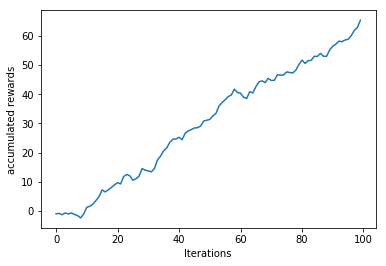

In [35]:
for i in range(100):
    g.play()

g.plot_rewards()

0